## Лабораторная работа №1

**Петров Кирилл**

In [1]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
from math import fabs
plt.rcParams.update({'font.size': 14})

### Задача №1

#### Постановка:
Рассмотрим математическую модель генной регулиризации - авторегрессор без задержки. Эта система описывается уравнением:
$$ \dot x=\frac{\alpha}{1 + x^{n}} - x  $$

Состояние равновесия находится уравнением:
$$ x^{n+1} + x - \alpha = 0 $$

Данная функция моннотонная и возврастающая на области $x>0$ следователно имеет один действительный корень в этой области. Будем искать корень уравнения $x^*$ методами *Ньютона* и *Дитохомии*.

#### Задание:
1. При разных $n$ построить графики зависимости корня $x^*$ от параметра $\alpha$.
2. При фиксированном $n$ и $\alpha$ сравнить сходимоть метода Ньютона и метода Дитохомии

#### Решение:

Для авторегрессора значение функции принимает значение: $ f(x) = x^{n+1} + x - \alpha $. А производная: $ f'(x) = (n+1)x^{n} + 1 $

In [2]:
class AutoRegressor:
    def __init__(self, alpha, n):
        self.alpha, self.n = alpha, n
        
    def value(self, x):
        return x**(self.n + 1) + x - self.alpha
    
    def derivative(self, x):
        return (self.n + 1) * x**(self.n) + 1.0

Метод Ньютона:
$$ x_{n+1} = x_{n} - \frac{f(x_n)}{f'(x_n)}$$

Критерий остановки:

$$ |f(x_{n+1} - f(x_n)| < \epsilon $$

In [3]:
def newton(f, x0, max_iter = 1000, eps = 1e-8):
    x = x0
    path = []
    for it in range(max_iter):
        xn = x - f.value(x) / f.derivative(x)
        path.append(fabs(xn - x))
        if path[-1] <= eps:
            break
        x = xn
    return xn, path

Метод Дитохомии:


Выбираем точку $c=\frac{a_0 + b_0}{2}$
- Если $f(c) > 0 \Rightarrow a_1=a_0, b_1 = c$
- Иначе $ a_1 = c, b_1 = b_0 $

In [4]:
def dichotomy(f, a, b, max_iter = 1000, eps = 1e-8):
    path = []
    for it in range(max_iter):
        c = (a + b)*0.5
        if  f.value(c) > 0:
            a, b = a, c
        else:
            a, b = c, b
            
        path.append(fabs(b - a))
        if path[-1] <= eps:
            break
        
    return c, path

При разных $n$ графики зависимости корня $x^*$ от параметра $\alpha$ в методе Ньютона и Дитохомии при $n = \{2, 4, 6\}$ и $\alpha \in [0; 10]$.

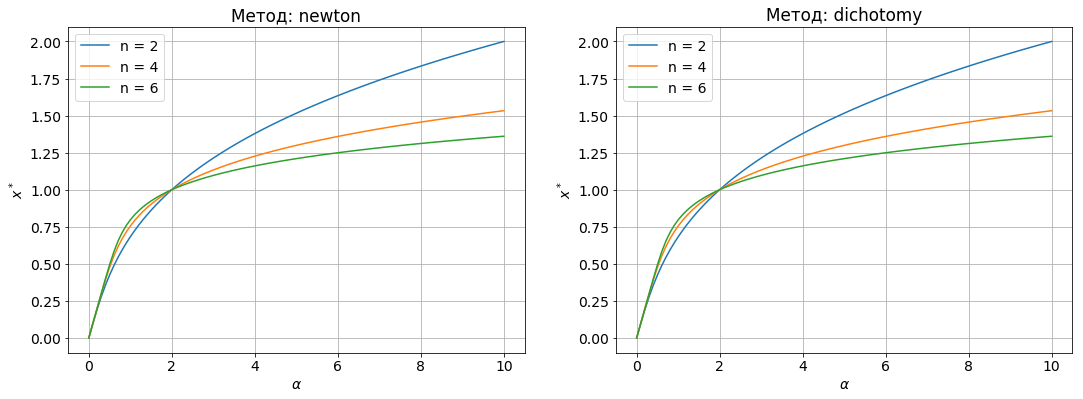

In [5]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

n_arr = [2, 4, 6]
alpha_arr = np.linspace(0.0, 10.0, 100)

for n in n_arr:
    x_answer_newton = []
    x_answer_dichotomy = []
    for alpha in alpha_arr:
        regressor = AutoRegressor(alpha, n)
        x_newton, _ = newton(regressor, alpha)
        x_dichotomy, _ = dichotomy(regressor, 0, alpha*10)
        x_answer_newton.append(x_newton)
        x_answer_dichotomy.append(x_dichotomy)
    ax1.set_title('Метод: newton'); ax2.set_title('Метод: dichotomy')
    for ax, x_answer in ((ax1, x_answer_newton), (ax2, x_answer_dichotomy)):
        ax.plot(alpha_arr, x_answer, label='n = {}'.format(n))
        ax.legend()
        ax.grid(True)
        ax.set_xlabel(r'$\alpha$')
        ax.set_ylabel(r'$x^*$')

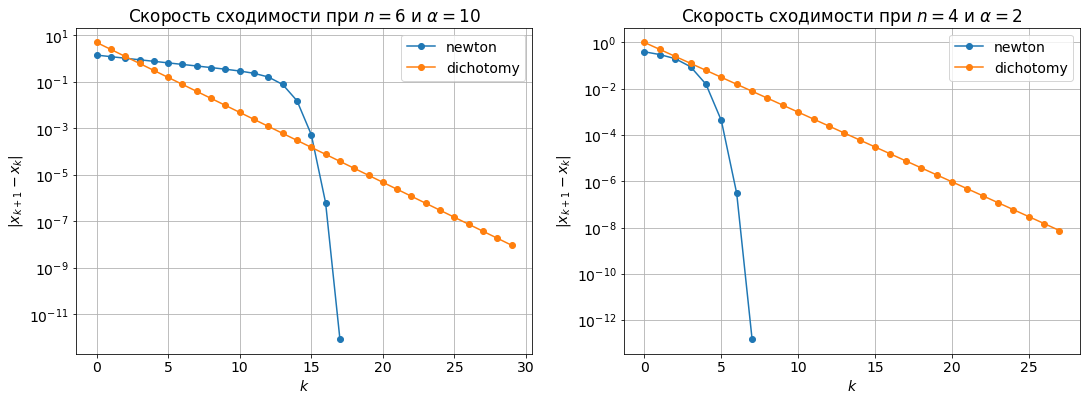

In [6]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

for ax, n, alpha in (ax1, 6, 10), (ax2, 4, 2):
    regressor = AutoRegressor(alpha, n)
    x_newton, p_newton = newton(regressor, alpha)
    x_dichotomy, p_dichotomy = dichotomy(regressor, 0, alpha)
    
    ax.set_title(r'Скорость сходимости при $n={}$ и $\alpha={}$'. format(n, alpha))
    ax.plot(p_newton, 'o-', label='newton'.format(n))
    ax.plot(p_dichotomy, 'o-', label='dichotomy'.format(n))

    ax.legend()
    ax.grid(True)
    ax.set_yscale('log')
    ax.set_ylabel(r'$|x_{k+1} - x_{k}|$')
    ax.set_xlabel(r'$k$')

Хорошо заметно, что метод Ньютона сходится намного быстрее, чем метод Дитохомии.

### Задача №2

#### Постановка:

Рассмотрим систему, которая описывает генный переключатель:
$$
\begin{cases}
   \dot x_1 = \frac{\alpha}{1+x_2^n} -x_1 \\
   \dot x_2 = \frac{\alpha}{1+x_1^n} -x_2 \\
\end{cases}
$$

Система для поиска состояний равновесия:
$$
\begin{cases}
   x_1 = \frac{\alpha}{1+x_2^n} \\
   x_2 = \frac{\alpha}{1+x_1^n} \\
\end{cases}
$$

Выражаем одно через другое и получаем уравнение:

$$
x_1(1+x_1^n)^n-\alpha (1+x_1^n)^n + \alpha ^nx_1 = 0
$$

При $n=2$ оно принимает следующий вид:

$$
x^5 - \alpha x^4 + 2x^3 - 2\alpha x^2 + (1+\alpha ^2)x - \alpha = 0
$$

#### Задание:

1. Построить график зависимости корней от $\alpha$ уравнения $x^5 - \alpha x^4 + 2x^3 - 2\alpha x^2 + (1+\alpha ^2)x - \alpha = 0$

Это уравнение можно представить в виде произведения двух полиномов:

$$
\begin{cases}
    P_5(x) = P_3(x)P_2(x) \\
    P_2(x) = x^2 - \alpha x + 1 \\
    P_3(x) = x^3 + x - \alpha \\
\end{cases}
$$

Уравнение $P_3(x)$ имеет один корень и мы найдем его численно. $P_2(x)$ может иметь один или два корня взависимости от $\alpha$. Тогда полином $P_5(x)$ может иметь один, два или три корня.

Для $P_2$ значение полинома принимает значение: $ P_2(x) = x^2 - \alpha x + 1$. А производная: $ P_2'(x) = 2x - \alpha  $

In [7]:
class P2:
    def __init__(self, alpha):
        self.alpha = alpha
        
    def value(self, x):
        return x**2 - self.alpha*x + 1
    
    def derivative(self, x):
        return 2*x - self.alpha

Для $P_3$ значение полинома принимает значение: $ P_3(x) = x^3 + x - \alpha$. А производная: $ P_3'(x) = 3x^2 + 1 $

In [8]:
class P3:
    def __init__(self, alpha):
        self.alpha = alpha
        
    def value(self, x):
        return x**3 + x - self.alpha
    
    def derivative(self, x):
        return 3*x**2 + 1

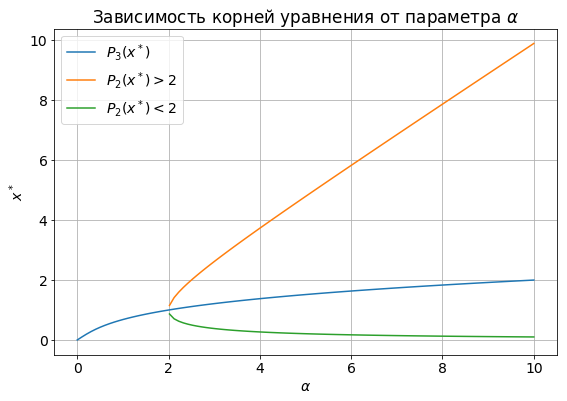

In [9]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

alpha_arr = np.linspace(0.0, 10.0, 100)

x_answer_P3 = []
x_answer_P2_pos = []
x_answer_P2_neg = []
for alpha in alpha_arr:
    P3_objective = P3(alpha)
    x_newton, _ = newton(P3_objective, alpha)
    x_answer_P3.append(x_newton)

    if alpha >= 2:
        P2_objective = P2(alpha)
        x_newton, _ = newton(P2_objective, alpha)
        x_answer_P2_pos.append(x_newton)
        
        x_newton, _ = newton(P2_objective, -alpha)
        x_answer_P2_neg.append(x_newton)
    
ax.set_title(r'Зависимость корней уравнения от параметра $\alpha$')
ax.plot(alpha_arr, x_answer_P3, label=r'$P_3(x^*)$'.format(n))
ax.plot(alpha_arr[alpha_arr >= 2], x_answer_P2_pos, label=r'$P_2(x^*) > 2$'.format(n))
ax.plot(alpha_arr[alpha_arr >= 2], x_answer_P2_neg, label=r'$P_2(x^*) < 2$'.format(n))
ax.legend()
ax.grid(True)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$x^*$')
pass

Видно, что при $\alpha > 2$ появляются новые корни и уравнение имеет три состояния равновесия.